In [16]:
from regain.datasets.hmm import generate_hmm
from regain.hmm.incremental_hmm_graphical_lasso import Incremental_HMM_GraphicalLasso as IncHMM
import numpy as np
from importlib import reload
import regain.hmm.utils; reload(regain.hmm.utils)
from regain.hmm.utils import results_recap,prepare_data_to_predict
from regain.hmm.utils import cross_validation
from regain.hmm.hmm_graphical_lasso import HMM_GraphicalLasso
import matplotlib.pyplot as plt

In [2]:
N_samples = 1000
N_states = 5
N_TS = 10
sigma_Normal = 1


In [3]:
Ntrial =10

res_Vmeas_batch = 0
res_MCC_batch = 0

lists_perc_increm = [0.025,0.05,0.075,0.1, 0.15,0.2,0.25,0.3]

res_Vmeas_Inc = np.zeros(len(lists_perc_increm))
res_MCC_Inc = np.zeros(len(lists_perc_increm))

for n in range(Ntrial):


    dataset = generate_hmm(n_samples= N_samples,
                           n_states=N_states,
                           n_dim_obs=N_TS,
                           mode_precisions='regain',
                           mode_mean = 'Normal',
                           transition_type='fixed',
                           sigma=sigma_Normal)

    lambda_GL = 30
    toll = 1e-4
    max_iterations = 100
    reps = 10

        
    # Batch
    
    hmm_gmm = HMM_GraphicalLasso(n_clusters=N_states,
                             alpha=lambda_GL,
                             tol=toll,
                             verbose=False,
                             mode='scaled',
                             warm_restart=True,
                             max_iter=max_iterations,
                             repetitions=reps,
                             n_jobs=-1)
    hmm_gmm.fit(dataset['data'])
    res_batch = results_recap(dataset['states'], hmm_gmm.labels_, dataset['thetas'], hmm_gmm.precisions_, 
                  dataset['gammas'], hmm_gmm.gammas_)
    
    res_Vmeas_batch += res_batch['v_measure [0, 1]']/Ntrial
    res_MCC_batch += res_batch['weighted_mean_mcc [-1, 1]'][0]/Ntrial
    
    
    # Incremental

    for ii,perc_increm in enumerate(lists_perc_increm):

        mdl = IncHMM(n_clusters=N_states,
                     alpha=lambda_GL,
                     n_for_init=int(N_samples*(1-perc_increm)),
                     max_iter=max_iterations,
                     tol=toll,
                     verbose=False,
                     warm_restart=True,
                     repetitions=reps,
                     n_jobs=-1)
        
        mdl.fit(dataset['data'])
        res_increm = results_recap(dataset['states'], mdl.labels_, dataset['thetas'], mdl.precisions_, 
                      dataset['gammas'], mdl.gammas_)
        
        res_Vmeas_Inc[ii] = res_Vmeas_Inc[ii] + res_increm['v_measure [0, 1]']/Ntrial
        res_MCC_Inc[ii] = res_MCC_Inc[ii] + res_increm['weighted_mean_mcc [-1, 1]'][0]/Ntrial

/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(c

/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(c

LinAlgError: Eigenvalues did not converge

In [26]:
resV_tot = []
resV_tot.append(res_Vmeas_batch)
resV_tot.extend(res_Vmeas_Inc)

In [27]:
print(resV_tot)

[0.5157689309995399, 0.4904859249499856, 0.4597801532130039, 0.4351889117521401, 0.40962166311123627, 0.3137274512699714, 0.28132663618310677, 0.2538057075448218, 0.23546442736481427]


In [13]:
print(res_Vmeas_Inc/res_Vmeas_batch)

[0.95097997 0.89144601 0.84376721 0.79419608 0.60827133 0.54545092
 0.49209189 0.45653085]


In [12]:
print(res_MCC_Inc/res_MCC_batch)

[0.6781971  0.63221206 0.62709831 0.62712536 0.41341269 0.32319731
 0.2634368  0.28948801]


In [22]:
list_a = [1-i for i in [0,0.025,0.05,0.075,0.1, 0.15,0.2,0.25,0.3]]

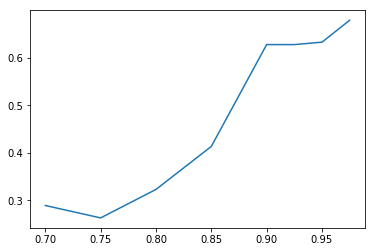

In [17]:
plt.plot(list_a,res_MCC_Inc/res_MCC_batch)

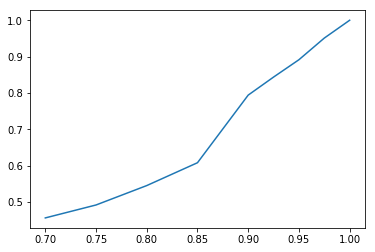

In [28]:
plt.plot(list_a,resV_tot/res_Vmeas_batch)